# Анализ бизнес показателей приложения Procrastinate Pro+

# Описание проекта

Несмотря на огромные вложения в рекламу Procrastinate Pro+, последние несколько месяцев компания терпит убытки.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Нужно изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.

**Таблица visits_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Таблица orders_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Таблица costs_info_short.csv**
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-бизнес-показателей-приложения-Procrastinate-Pro+" data-toc-modified-id="Анализ-бизнес-показателей-приложения-Procrastinate-Pro+-1">Анализ бизнес показателей приложения Procrastinate Pro+</a></span></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-2">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3">Описание данных</a></span></li><li><span><a href="#Создание-функций-для-работы-с-данными" data-toc-modified-id="Создание-функций-для-работы-с-данными-4">Создание функций для работы с данными</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Функция-для-создания-пользовательских-профилей" data-toc-modified-id="Функция-для-создания-пользовательских-профилей-4.0.1">Функция для создания пользовательских профилей</a></span></li><li><span><a href="#Функция-для-расчета-удержания" data-toc-modified-id="Функция-для-расчета-удержания-4.0.2">Функция для расчета удержания</a></span></li><li><span><a href="#Функция-для-расчета-конверсии" data-toc-modified-id="Функция-для-расчета-конверсии-4.0.3">Функция для расчета конверсии</a></span></li><li><span><a href="#Функция-для-расчета-LTV-и-ROI" data-toc-modified-id="Функция-для-расчета-LTV-и-ROI-4.0.4">Функция для расчета LTV и ROI</a></span></li></ul></li></ul></li><li><span><a href="#Создание-функций-для-визуализации-данных" data-toc-modified-id="Создание-функций-для-визуализации-данных-5">Создание функций для визуализации данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Функция-для-сглаживания-фрейма" data-toc-modified-id="Функция-для-сглаживания-фрейма-5.0.1">Функция для сглаживания фрейма</a></span></li><li><span><a href="#Функция-для-визуализации-удержания" data-toc-modified-id="Функция-для-визуализации-удержания-5.0.2">Функция для визуализации удержания</a></span></li><li><span><a href="#Функция-для-визуализации-конверсии" data-toc-modified-id="Функция-для-визуализации-конверсии-5.0.3">Функция для визуализации конверсии</a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-5.0.4">Функция для визуализации LTV и ROI</a></span></li></ul></li></ul></li><li><span><a href="#Загрузка-и-подготовка-к-анализу-данных" data-toc-modified-id="Загрузка-и-подготовка-к-анализу-данных-6">Загрузка и подготовка к анализу данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-6.0.1">Импорт библиотек</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-6.1">Загрузка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Создаем-переменные" data-toc-modified-id="Создаем-переменные-6.1.0.1">Создаем переменные</a></span></li><li><span><a href="#Выводим-общую-информацию-о-таблицах" data-toc-modified-id="Выводим-общую-информацию-о-таблицах-6.1.0.2">Выводим общую информацию о таблицах</a></span></li><li><span><a href="#Наблюдения-по-методам-info()-head()-и-describe()" data-toc-modified-id="Наблюдения-по-методам-info()-head()-и-describe()-6.1.0.3">Наблюдения по методам info() head() и describe()</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-6.1.1">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-6.1.1.1">Дубликаты</a></span></li><li><span><a href="#Единый-стиль" data-toc-modified-id="Единый-стиль-6.1.1.2">Единый стиль</a></span></li><li><span><a href="#Тип-данных-(datetime)" data-toc-modified-id="Тип-данных-(datetime)-6.1.1.3">Тип данных (datetime)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1.1.4">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-7">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Пользовательские-профили" data-toc-modified-id="Пользовательские-профили-7.1">Пользовательские профили</a></span><ul class="toc-item"><li><span><a href="#Минимальная-и-максимальная-даты-привлечения" data-toc-modified-id="Минимальная-и-максимальная-даты-привлечения-7.1.1">Минимальная и максимальная даты привлечения</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1.1.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Распределение-пользователей-по-странам" data-toc-modified-id="Распределение-пользователей-по-странам-7.2">Распределение пользователей по странам</a></span><ul class="toc-item"><li><span><a href="#Доля-платящих-пользователей-по-странам" data-toc-modified-id="Доля-платящих-пользователей-по-странам-7.2.1">Доля платящих пользователей по странам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.2.1.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Распределение-пользователей-по-устройствам" data-toc-modified-id="Распределение-пользователей-по-устройствам-7.3">Распределение пользователей по устройствам</a></span><ul class="toc-item"><li><span><a href="#Доля-платящих-пользователей-по-устройствам" data-toc-modified-id="Доля-платящих-пользователей-по-устройствам-7.3.1">Доля платящих пользователей по устройствам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.3.1.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Распределение-рекламных-источников-по-привлеченным-пользователям" data-toc-modified-id="Распределение-рекламных-источников-по-привлеченным-пользователям-7.4">Распределение рекламных источников по привлеченным пользователям</a></span><ul class="toc-item"><li><span><a href="#Доля-платящих-пользователей-по-рекламным-каналам" data-toc-modified-id="Доля-платящих-пользователей-по-рекламным-каналам-7.4.1">Доля платящих пользователей по рекламным каналам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.4.1.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-8">Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-8.1">Общая сумма расходов на маркетинг</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1.0.1">Вывод</a></span></li></ul></li><li><span><a href="#Распределение-расходов-по-источникам" data-toc-modified-id="Распределение-расходов-по-источникам-8.1.1">Распределение расходов по источникам</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1.1.1">Вывод</a></span></li></ul></li><li><span><a href="#График-изменения-метрик-во-времени" data-toc-modified-id="График-изменения-метрик-во-времени-8.1.2">График изменения метрик во времени</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1.2.1">Вывод</a></span></li><li><span><a href="#Посмотрим-на-эти-данные-с-распределением-по-каналам" data-toc-modified-id="Посмотрим-на-эти-данные-с-распределением-по-каналам-8.1.2.2">Посмотрим на эти данные с распределением по каналам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1.2.3">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Стоимость-привлечения-одного-пользователя" data-toc-modified-id="Стоимость-привлечения-одного-пользователя-8.2">Стоимость привлечения одного пользователя</a></span><ul class="toc-item"><li><span><a href="#Средний-CAC--на-одного-пользователя" data-toc-modified-id="Средний-CAC--на-одного-пользователя-8.2.1">Средний CAC  на одного пользователя</a></span></li><li><span><a href="#Сравним-среднюю-стоимость-с-рспределением-среднейц-стоимости-среди-источников" data-toc-modified-id="Сравним-среднюю-стоимость-с-рспределением-среднейц-стоимости-среди-источников-8.2.2">Сравним среднюю стоимость с рспределением среднейц стоимости среди источников</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.2.2.1">Вывод</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-9">Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Общая-окупаемость-рекламы" data-toc-modified-id="Общая-окупаемость-рекламы-9.1">Общая окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Графики-LTV,-ROI--и-графики-динамики-LTV,-CAC-и-ROI" data-toc-modified-id="Графики-LTV,-ROI--и-графики-динамики-LTV,-CAC-и-ROI-9.1.1">Графики LTV, ROI  и графики динамики LTV, CAC и ROI</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-графикам" data-toc-modified-id="Выводы-по-графикам-9.1.1.1">Выводы по графикам</a></span></li></ul></li></ul></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-9.2">Окупаемость рекламы с разбивкой по рекламным каналам</a></span><ul class="toc-item"><li><span><a href="#Графики-LTV,-ROI-и-графики-динамики-LTC,-CAC,-ROI" data-toc-modified-id="Графики-LTV,-ROI-и-графики-динамики-LTC,-CAC,-ROI-9.2.1">Графики LTV, ROI и графики динамики LTC, CAC, ROI</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.2.1.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-9.3">Окупаемость рекламы с разбивкой по странам</a></span><ul class="toc-item"><li><span><a href="#Графики-LTV,-ROI--и-графики-динамики-LTV,-CAC-и-ROI" data-toc-modified-id="Графики-LTV,-ROI--и-графики-динамики-LTV,-CAC-и-ROI-9.3.1">Графики LTV, ROI  и графики динамики LTV, CAC и ROI</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.3.1.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам" data-toc-modified-id="Графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам-9.4">Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.4.0.1">Вывод</a></span></li></ul></li><li><span><a href="#Окупается-ли-реклама-в-целом?" data-toc-modified-id="Окупается-ли-реклама-в-целом?-9.4.1">Окупается ли реклама в целом?</a></span></li><li><span><a href="#Какие-устройства,-страны-и-каналы-могу-снижать-окупаемость-рекламы?" data-toc-modified-id="Какие-устройства,-страны-и-каналы-могу-снижать-окупаемость-рекламы?-9.4.2">Какие устройства, страны и каналы могу снижать окупаемость рекламы?</a></span></li><li><span><a href="#Чем-могут-быть-вызваны-проблемы-окупаемости?" data-toc-modified-id="Чем-могут-быть-вызваны-проблемы-окупаемости?-9.4.3">Чем могут быть вызваны проблемы окупаемости?</a></span></li></ul></li><li><span><a href="#Промежуточные-рекомендации-для-рекламного-отдела" data-toc-modified-id="Промежуточные-рекомендации-для-рекламного-отдела-9.5">Промежуточные рекомендации для рекламного отдела</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-10">Выводы</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-для-отдела-маркетинга" data-toc-modified-id="Рекомендации-для-отдела-маркетинга-10.1">Рекомендации для отдела маркетинга</a></span></li></ul></li></ul></div>

 # Создание функций для работы с данными

### Функция для создания пользовательских профилей

In [1]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета удержания

In [2]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета конверсии 

In [3]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


### Функция для расчета LTV и ROI 

In [4]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# Создание функций для визуализации данных

###  Функция для сглаживания фрейма

In [5]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

In [6]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [7]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [8]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

 # Загрузка и подготовка к анализу данных

### Импорт библиотек 

In [9]:
import pandas as pd 
import numpy as np 
from datetime import datetime, timedelta
from matplotlib import pyplot as plt 

## Загрузка данных

#### Создаем переменные 

In [10]:
# Создаем переменную путь к файлу
#(можно заменить на свои при работе на локальном устройстве)
file_path = '/Users/danielnodelman/Downloads/'
try:
# Загружаем данные в переменные на локальном утройстве 
    visits, orders, costs  = (pd.read_csv('/datasets/visits_info_short.csv'),
                          pd.read_csv('/datasets/orders_info_short.csv'),
                          pd.read_csv('/datasets/costs_info_short.csv'),
                         )
except:
# Загружаем данные в переменные 
    visits, orders, costs  = (pd.read_csv(file_path + 'visits_info_short.csv'),
                          pd.read_csv(file_path + 'orders_info_short.csv'),
                          pd.read_csv(file_path + 'costs_info_short.csv'),
)

                          

#### Выводим общую информацию о таблицах 

Используем методы info() и describe(), а также выведем первые 10 строк каждой из таблиц

In [11]:
# Метод info()
visits.info()
print( )
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

In [12]:
# Метод describe()
# orders.describe()
# costs.describe()
# visits.describe()

In [13]:
# Метод head()
#visits.head(10)
#orders.head(10)
#costs.head(10)

#### Наблюдения по методам info() head() и describe()

- Общее количество значений совпадает с количеством ненулевых значений в столбцах 
- Названия столбцов нужно привести к нижнему регистру и устранить пробелы для соответсвия единому стилю
- Значения 'session_start', 'session_end', 'event_dt', 'dt' в таблицах нужно привести к datetime

### Предобработка данных 

#### Дубликаты



Проверим таблицы на наличие явных дубликатов при помощи методов  duplicated() и sum()

In [14]:
print(f'Количество дубликатов visits: {visits.duplicated().sum()}')
print(f'Количество дубликатов orders: {orders.duplicated().sum()}')
print(f'Количество дубликатов costs: {costs.duplicated().sum()}')

Количество дубликатов visits: 0
Количество дубликатов orders: 0
Количество дубликатов costs: 0


#### Единый стиль

In [15]:
# Создаем список с таблицами в которых нужно поменять стиль заголовков
tables_to_change_style = [visits, orders, costs]

# Проходим циклом по списку с таблицами
# Применяем метод lower() джля преведния столбцов к нижнему регистру
# Применяем метод replace() для змеиного регистра
for i in tables_to_change_style:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

#### Тип данных (datetime)

Значения в столбцах 'session_start', 'session_end', 'event_dt', 'dt' нужно привести к datetime

In [16]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Вывод

- В таблицах отсутсвуют дубликаты
- Столбцы преведены к единому стилю (змеиный регистр)
- Типы данных в столбцах преобразованы и соответствуют значениям

Можно приступать к исследовательскому анализу

# Исследовательский анализ данных

## Пользовательские профили

Применим функцию get_profiles к таблицам чтобы создать пользовательские профили

In [17]:
profiles = get_profiles(visits, orders, costs)

Проверим получившийся результат

In [18]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


### Минимальная и максимальная даты привлечения

In [19]:
# Горизонт анализа
horizon_days = 14 
ignore_horizon = False

# Минимальная дата анализа
min_analysis_date = profiles['dt'].min()

# Момент анализа
observation_date = datetime(2019, 11, 1).date() 

# Максимальная дата анализа 
max_analysis_date = profiles['dt'].max() 

print(observation_date-min_analysis_date)
print(f'Временной период исследования с {min_analysis_date} по {observation_date}')

184 days, 0:00:00
Временной период исследования с 2019-05-01 по 2019-11-01


#### Вывод 
- Созданы профили пользователей, они хранятся в переменной profiles
- Минимальная дата привлечения пользователей 2019-05-01
- Максимальная дата привлечения пользователей 2019-10-27 
- Даты совпадают с вводными данными
- Задан момент анализа первое ноября 2019

## Распределение пользователей по странам

Построим таблицу region_df, в которой сохраним результат группировки профилей по признаку region.

- user_count общее количество пользователей
- user_count_proportion доля пользователей  
- payer_count общее количество платящих пользователей 
- payer_count_proportion доля платящих пользователей  
- payer_proportion доля платящих пользователей от числа сгруппированных  

### Доля платящих пользователей по странам

In [20]:
# Создаем  таблицу
region_df = pd.DataFrame()

region_df['user_count'] = (profiles
    .groupby('region')['user_id']
    .count()
                         )

region_df['user_count_proportion']= (region_df['user_count']/
                                region_df['user_count']
                                .sum()*100
                              )

region_df['payer_count'] = (profiles.query('payer == True')
                                .groupby('region')['user_id']
                                .count())

region_df['payer_count_proportion']= (region_df['payer_count']
                               /region_df['payer_count']
                               .sum()*100)

region_df['payer_proportion'] = ((region_df['payer_count'] /
                             region_df['user_count'])
                            * 100)    
(region_df.sort_values(by='payer_count', ascending=False)
 .style
 .format({'user_count_proportion': '{:.2f}%',
          'payer_count_proportion': '{:.2f}%'
          ,'payer_proportion': '{:.2f}%'}))  

,user_count,user_count_proportion,payer_count,payer_count_proportion,payer_proportion
region,,,,,
United States,100002,66.66%,6902,77.72%,6.90%
UK,17575,11.72%,700,7.88%,3.98%
France,17450,11.63%,663,7.47%,3.80%
Germany,14981,9.99%,616,6.94%,4.11%


#### Вывод

- Наибольшее количество платящих пользователей в США (77.72%), как и пользователей в принципе (66.66%)
- Остальные метрики делятся между Англией и Францией практически поровну

## Распределение пользователей по устройствам

Построим таблицу device_df, в которой сохраним результат группировки профилей по признаку device

- user_count общее количество пользователей
- user_count_proportion доля пользователей  
- payer_count общее количество платящих пользователей 
- payer_count_proportion доля платящих пользователей  
- payer_proportion доля платящих пользователей от числа сгруппированных  

### Доля платящих пользователей по устройствам

In [21]:
device_df = pd.DataFrame()

device_df['user_count'] = (profiles
    .groupby('device')['user_id']
    .count()
                         )

device_df['user_count_proportion']= (device_df['user_count']/
                                device_df['user_count']
                                .sum()*100
                              )

device_df['payer_count'] = (profiles.query('payer == True')
                                .groupby('device')['user_id']
                                .count())

device_df['payer_count_proportion']= (device_df['payer_count']
                               /device_df['payer_count']
                               .sum()*100)

device_df['payer_proportion'] = ((device_df['payer_count'] /
                             device_df['user_count'])
                            * 100)    
(device_df.sort_values(by='payer_count', ascending=False)
 .style
 .format({'user_count_proportion': '{:.2f}%',
          'payer_count_proportion': '{:.2f}%',
          'payer_proportion': '{:.2f}%'}))  

,user_count,user_count_proportion,payer_count,payer_count_proportion,payer_proportion
device,,,,,
iPhone,54479,36.32%,3382,38.08%,6.21%
Android,35032,23.35%,2050,23.08%,5.85%
Mac,30042,20.03%,1912,21.53%,6.36%
PC,30455,20.30%,1537,17.31%,5.05%


#### Вывод 

- Наибольшее количество пользователей используют iPhone и Android. Из них платят в большем отношении владельцы iPhone 
- Большинство девайсов - мобильные устройства
- Пользователи PC  преобладают в количестве над пользователями MAC,но платят меньше

## Распределение рекламных источников по привлеченным пользователям

Построим таблицу channel_df, в которой сохраним результат группировки профилей по признаку channel.

- user_count общее количество пользователей
- user_count_proportion доля пользователей  
- payer_count общее количество платящих пользователей 
- payer_count_proportion доля платящих пользователей  
- payer_proportion доля платящих пользователей от числа сгруппированных  

### Доля платящих пользователей по рекламным каналам

In [22]:
channel_df = pd.DataFrame()

channel_df['user_count'] = (profiles
    .groupby('channel')['user_id']
    .count()
                         )

channel_df['user_count_proportion']= (channel_df['user_count']/
                                channel_df['user_count']
                                .sum()*100
                              )

channel_df['payer_count'] = (profiles.query('payer == True')
                                .groupby('channel')['user_id']
                                .count())

channel_df['payer_count_proportion']= (channel_df['payer_count']
                               /channel_df['payer_count']
                               .sum()*100)

channel_df['payer_proportion'] = ((channel_df['payer_count'] /
                             channel_df['user_count'])
                            * 100)    
(channel_df.sort_values(by='payer_count', ascending=False)
 .style
 .format({'user_count_proportion': '{:.2f}%',
          'payer_count_proportion': '{:.2f}%',
          'payer_proportion': '{:.2f}%'}))  

,user_count,user_count_proportion,payer_count,payer_count_proportion,payer_proportion
channel,,,,,
FaceBoom,29144,19.43%,3557,40.05%,12.20%
TipTop,19561,13.04%,1878,21.15%,9.60%
organic,56439,37.62%,1160,13.06%,2.06%
WahooNetBanner,8553,5.70%,453,5.10%,5.30%
AdNonSense,3880,2.59%,440,4.95%,11.34%
RocketSuperAds,4448,2.97%,352,3.96%,7.91%
LeapBob,8553,5.70%,262,2.95%,3.06%
OppleCreativeMedia,8605,5.74%,233,2.62%,2.71%
lambdaMediaAds,2149,1.43%,225,2.53%,10.47%


#### Вывод

- Наибольшее количество пользователей приходят сами (organic), но они конвертируются в платящих хуже всего
- Наибольший приток платящих клиентов иджет из каналов FaceBoom, TipTop	

# Маркетинг

##  Общая сумма расходов на маркетинг 

Выведем общую сумму расходов на маркетинг при помощи метода sum().

In [23]:
# Создаем переменную для суммы расходов 
cac_total = profiles['acquisition_cost'].sum()
# Округляем последние 2 знака
cac_total.round(2)

105497.3

#### Вывод 
Общая сумма затрат на маркетинг: **105497.3**

### Распределение расходов по источникам

Создадим таблицу и посчитаем в ней распределение расходов по канал привлечения а так же их долю от общего количества

In [24]:
cac_proportion = profiles.groupby('channel').agg({'acquisition_cost':['sum']})
cac_proportion.columns = ['sum']
cac_proportion['proportion']= cac_proportion['sum']/cac_proportion['sum'].sum()*100
cac_proportion.sort_values(by='sum', ascending=False).style.format({'proportion': '{:.2f}%'})

,sum,proportion
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


#### Вывод 

- Наибольшая сумма расходов приходится на источник TipTop (51.90%)
- За ним FaceBoom (30.75%) 
- Остальные распределены в малых долях

### График изменения метрик во времени

Посмотрим на какой преиод времени приходились наибольшие траты 

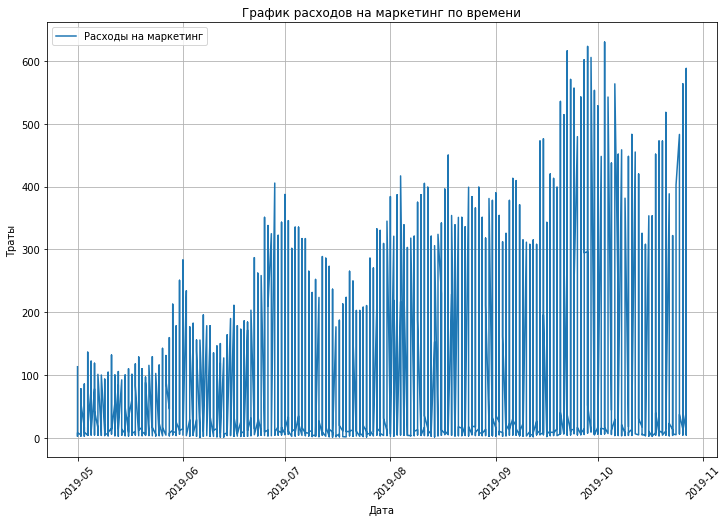

In [25]:
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
           ) 

plt.title('График расходов на маркетинг по времени')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

In [26]:
costs['month'] = pd.DatetimeIndex(costs['dt']).month
costs.head()

,dt,channel,costs,month
0,2019-05-01,FaceBoom,113.3,5
1,2019-05-02,FaceBoom,78.1,5
2,2019-05-03,FaceBoom,85.8,5
3,2019-05-04,FaceBoom,136.4,5
4,2019-05-05,FaceBoom,122.1,5


#### Вывод

- Наибольшее количество расходов приходится на конец сентября и начало октября

#### Посмотрим на эти данные с распределением по каналам 

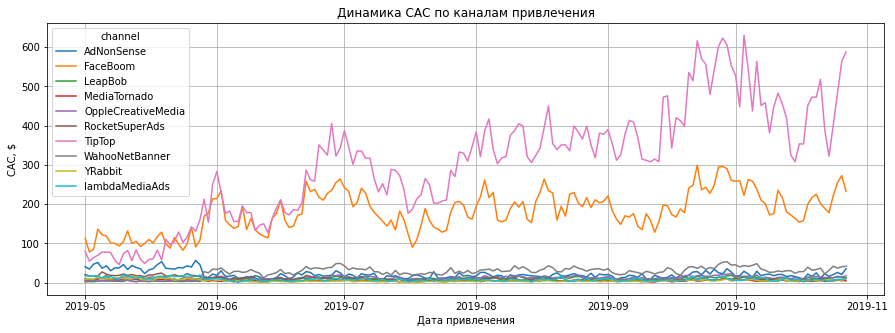

In [27]:
costs.pivot_table(
    index='dt',
    columns='channel',
    values='costs',
    aggfunc='mean'
).plot(grid=True,
       figsize=(15, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show() 

#### Вывод 

- Самая впечатляющая динамика роста у TipTop
- FaceBoom очень стабильная

## Стоимость привлечения одного пользователя 

### Средний CAC  на одного пользователя

Для того чтобы узнать среднюю стоимость привлечения пользователя, нужно отфилтровать таблицу profiles, а именно избавиться от источника organic так как он бесплатный 

In [28]:
profiles_payer = profiles.query('channel != "organic"')
round(profiles_payer['acquisition_cost'].mean(), 4)

1.1275

### Сравним среднюю стоимость с рспределением среднейц стоимости среди источников

In [29]:
cac_mean_channel = (profiles_payer.groupby('channel').agg({'acquisition_cost':['mean']}))
cac_mean_channel.columns = ['mean']
cac_mean_channel.sort_values(by='mean', ascending=False).style.format({'mean': '{:.2f}'})

,mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


#### Вывод
- FaceBoom наиболее приближен к среднему значению
- TipTop превосходит его больше чем в два раза 

# Оценка окупаемости рекламы

## Общая окупаемость рекламы

### Графики LTV, ROI  и графики динамики LTV, CAC и ROI

Применим описанные выше функции для подсчета и визуализации

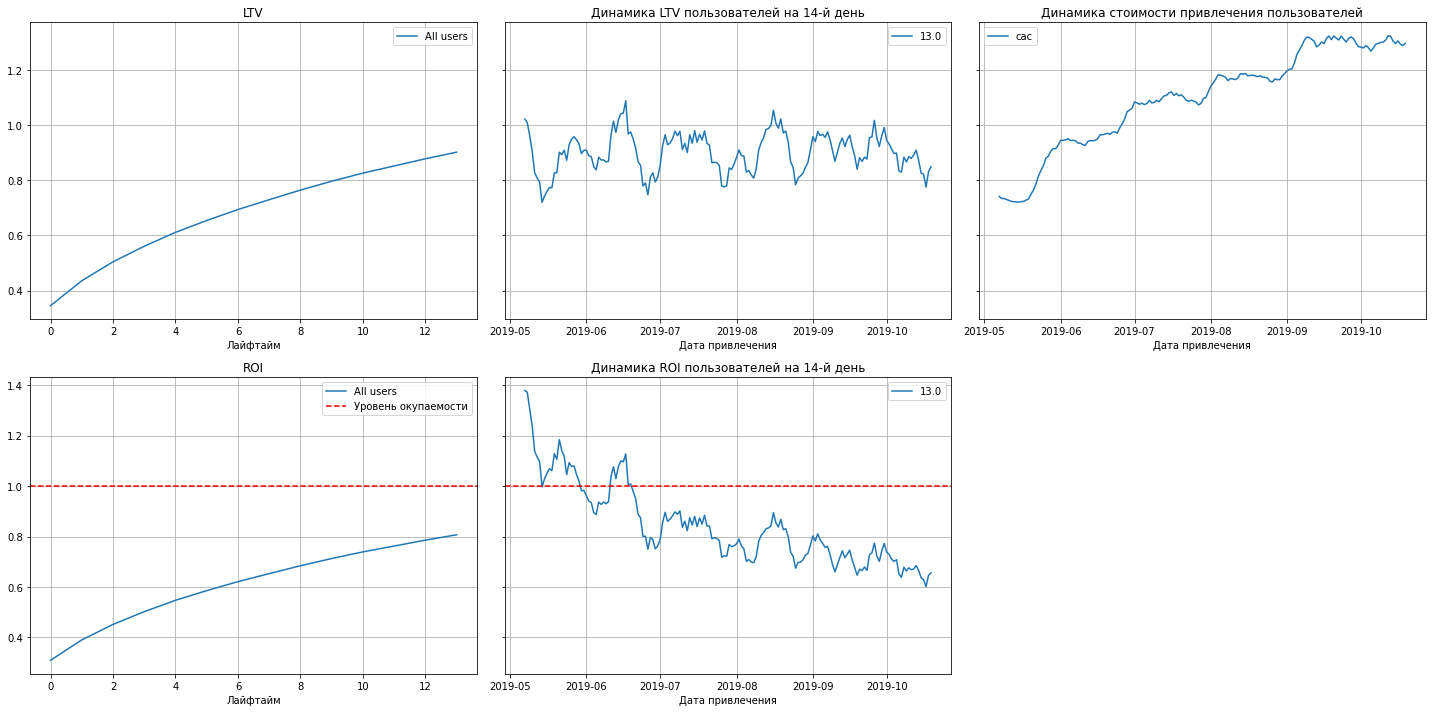

In [30]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Выводы по графикам

- Показартель LTV стабилен и сезонен
- По CAC можно сказать, что рекламный бюджет увеличивается
- ROI падает после июля
- Реклама не окупается к концу второй недели

## Окупаемость рекламы с разбивкой по рекламным каналам

### Графики LTV, ROI и графики динамики LTC, CAC, ROI

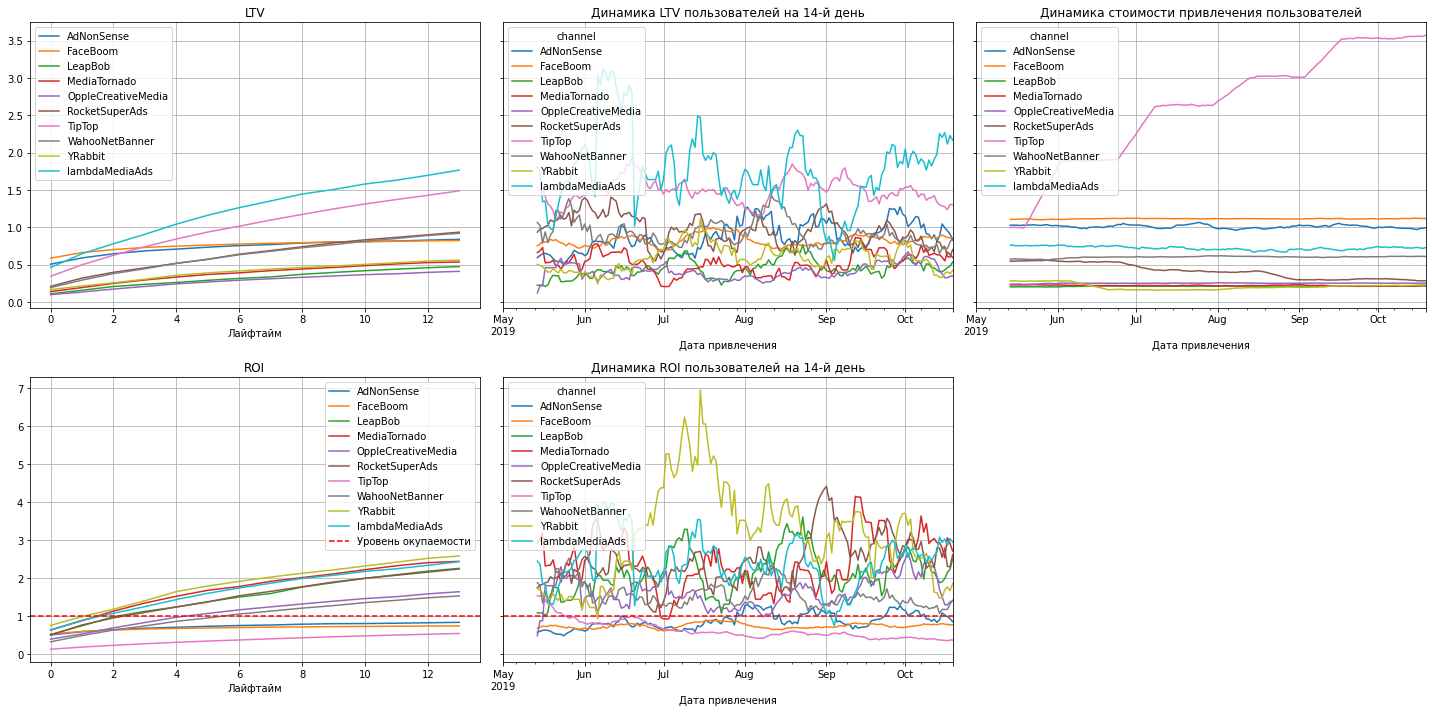

In [31]:
# Указываем параметр dimensions
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод

- На канал TipTop потрачено слишком много средств, при этом пользователи не окупились
- Удачной является рекламная сеть YRabbit (ROI, июль)

## Окупаемость рекламы с разбивкой по странам

### Графики LTV, ROI  и графики динамики LTV, CAC и ROI

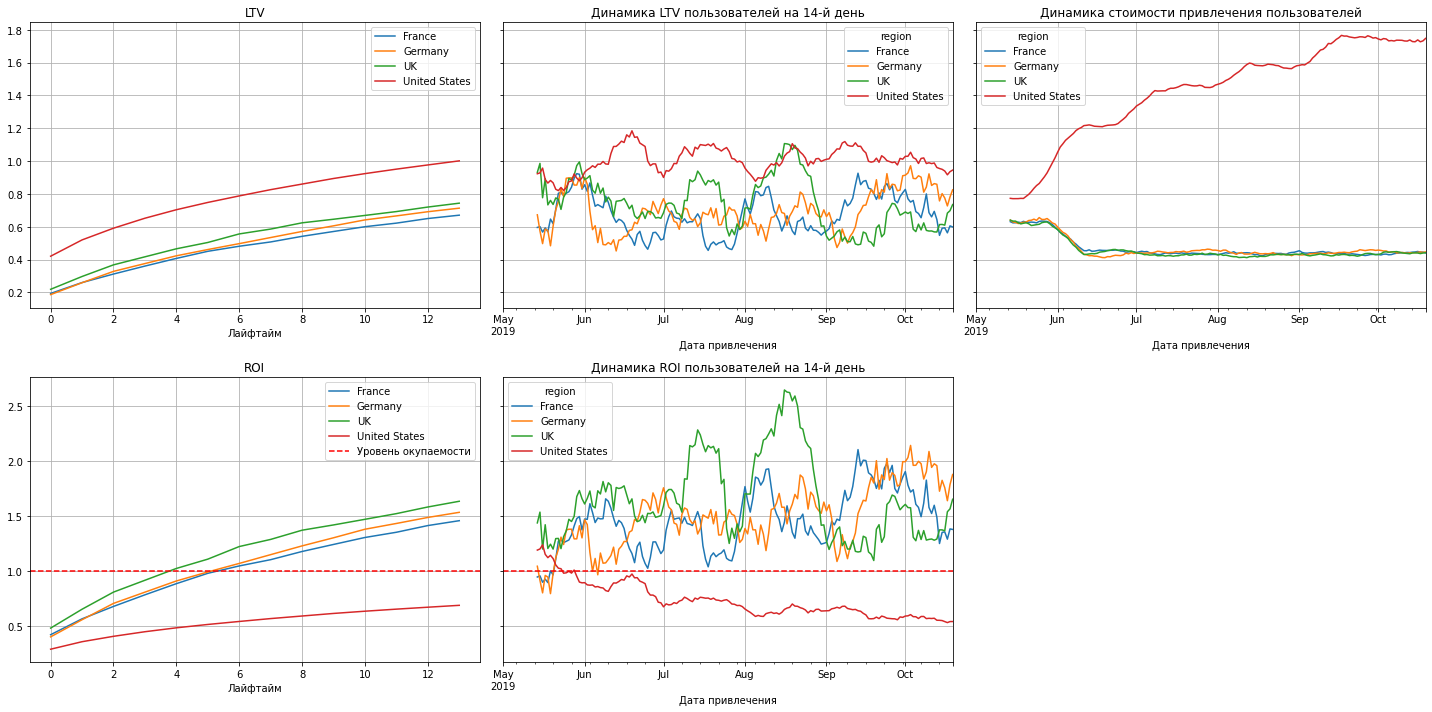

In [32]:
# Указываем параметр dimensions

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод

- В США уровень окупаемости рекламы низкий, а стоимость привлечения самая высокая. Окупаемость значительно падает с конца июня 2019 года
- Хорошо окупаются Англия и Германия

## Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

- Создадим список с названиями столбоцов таблицы по которым будем разбивать
- Пройдемся по этому списку циклом построения графиков конверсии и удержания с разбивкой 

Графики конверсии с разбивкой по ['device']



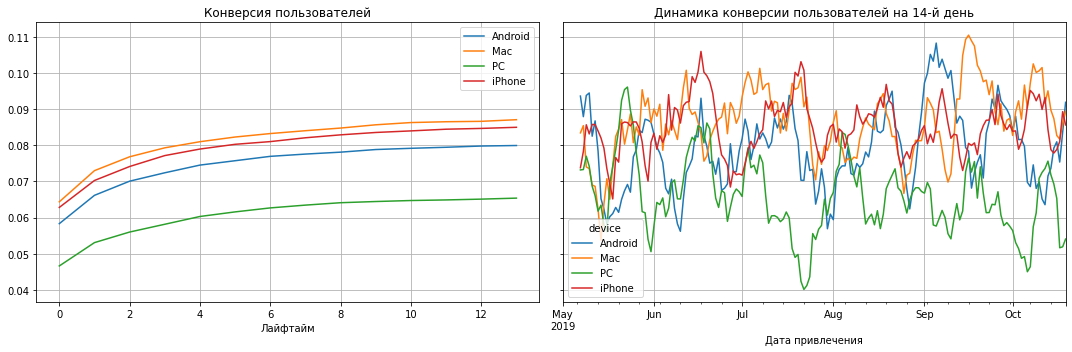


Графики удержания с разбивкой по ['device']



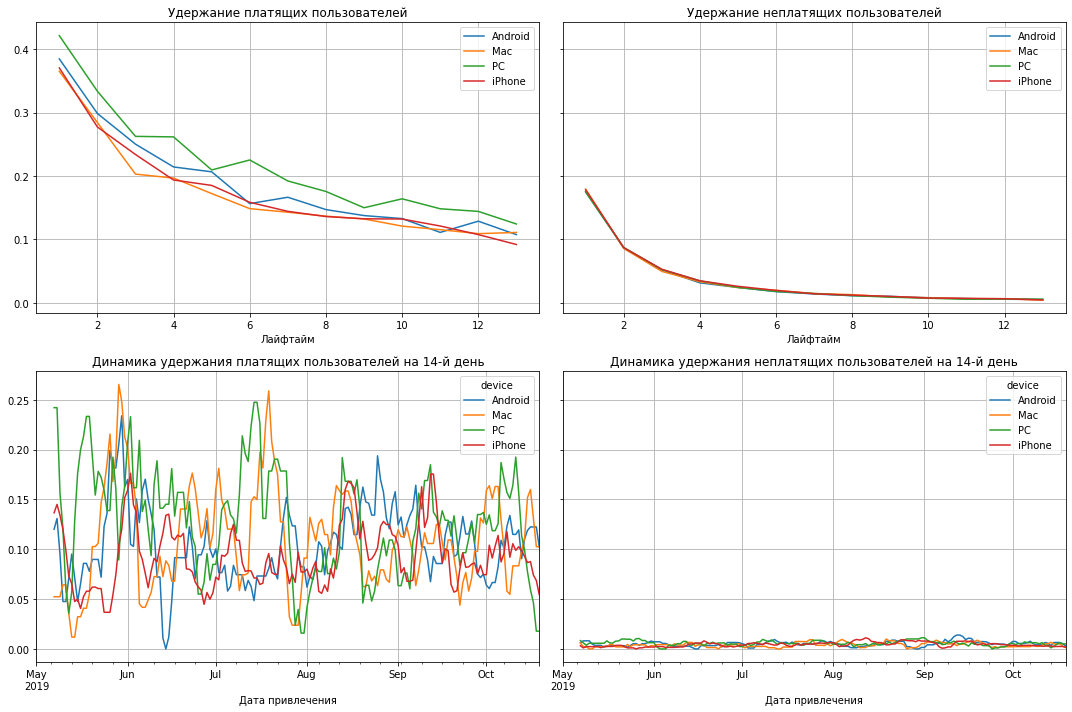


Графики конверсии с разбивкой по ['region']



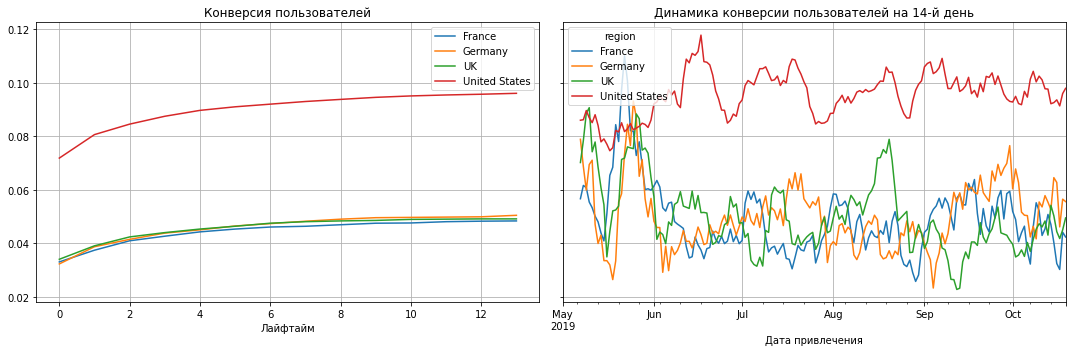


Графики удержания с разбивкой по ['region']



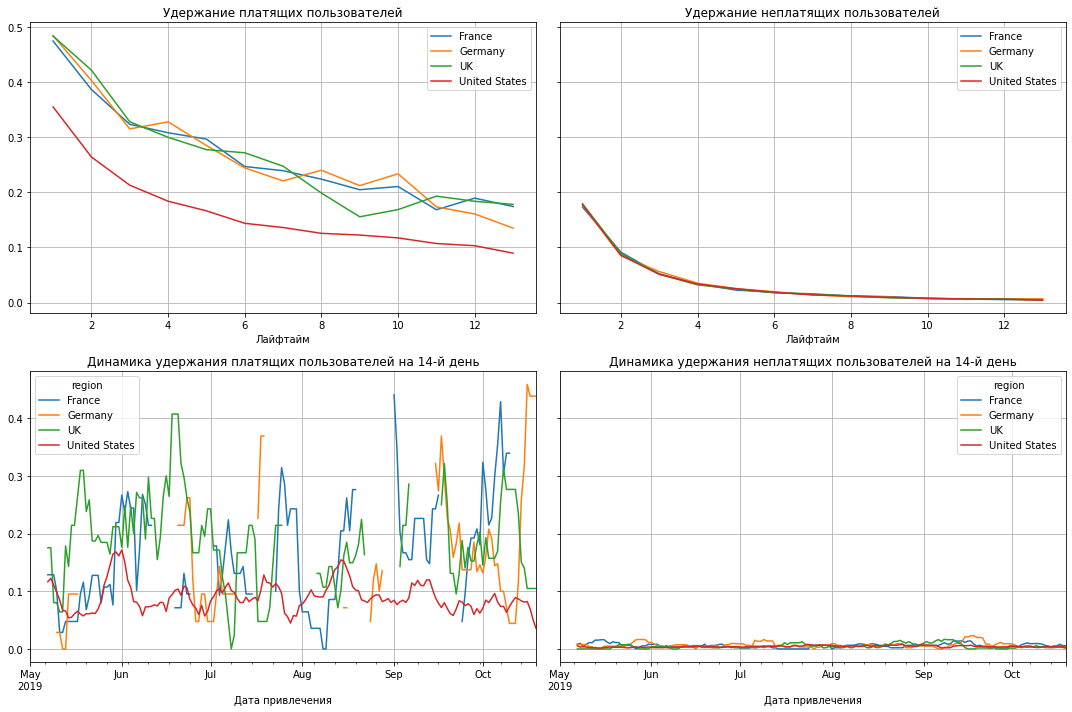


Графики конверсии с разбивкой по ['channel']



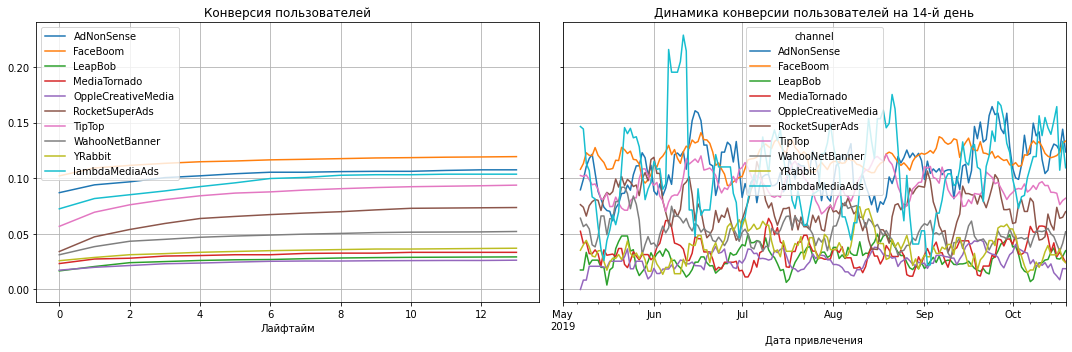


Графики удержания с разбивкой по ['channel']



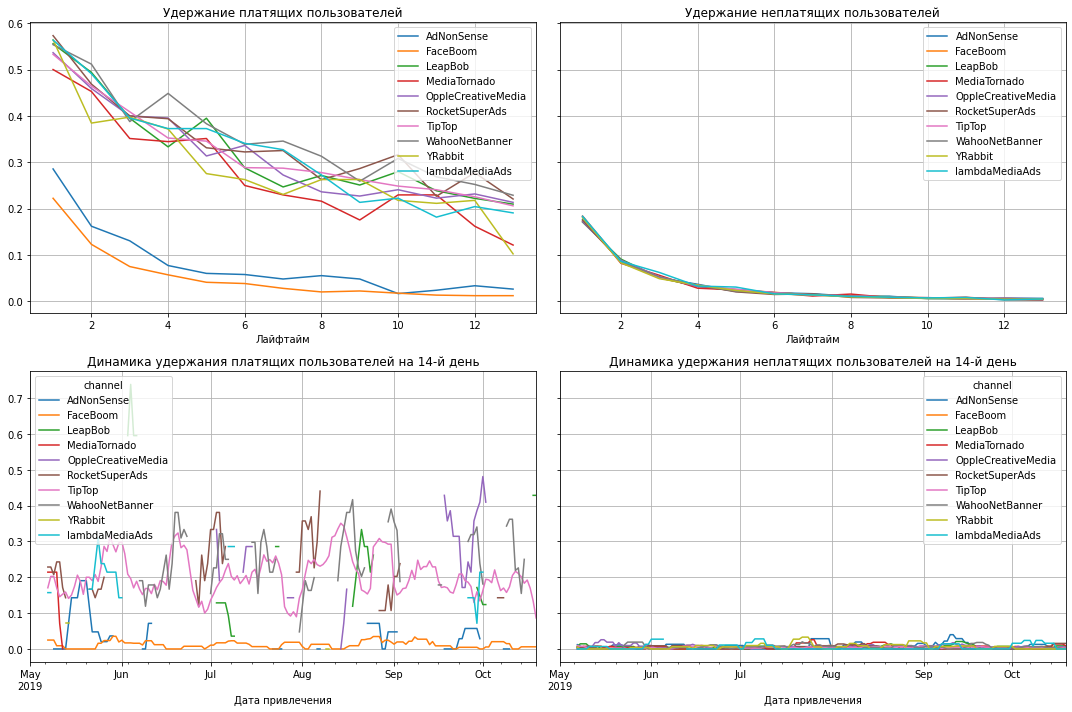

In [33]:
dimension = [['device'], ['region'], ['channel']] 
for dim in dimension:
    print(f'Графики конверсии с разбивкой по {dim}') 
    print()
    conversion_raw, conversion_grouped, conversion_history = get_conversion( 
      profiles_payer, orders, observation_date, horizon_days, dimensions=dim
  )
    plot_conversion(conversion_grouped, conversion_history, horizon_days)    
    print()
    print(f'Графики удержания с разбивкой по {dim}') 
    print()
    retention_raw, retention_grouped, retention_history = get_retention( 
      profiles_payer, visits, observation_date, horizon_days, dimensions=dim
  )
    plot_retention(retention_grouped, retention_history, horizon_days) 
    print()

#### Вывод

- Конверсия пользовваталей MAC и iPhone выше остальных. Пользователи с этим признаком плохо удерживаются.
- Из каналов RocketSuperAds, MediaTornado, YRabbit плохо конвертируются пользователи
- Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense. У Faceboom неплохая конверсия но серьезные проблемы с удержанием
- Пользователи из США плохо удерживаются. Возможно из за того что конверссия большая, но окупаемости нет эта группа пользователей имеет проблемы с отображением источников рекламы на их устройствах. (Apple)
- Пользователи PC и Android в основном из Англии Германии и Франции,  они хорошо удерживаются но их немного.

### Окупается ли реклама в целом?

- Реклама окупается на 80% с задержкой пользователей в две недели, учитывая органику.

### Какие устройства, страны и каналы могу снижать окупаемость рекламы?

- Окупаемость могут снижать пользователи MAC и iPhone из США. Конверсия этих пользователей выше остальных, но удерживаются они плохо.
- Не окупаются пользователи, привлеченные из каналов TipTop FaceBoom LeapBop

### Чем могут быть вызваны проблемы окупаемости?

- Неправильное распределение средств на рекламу
- Горизонт анализа может быть недостаточен для того чтобы увидеть окупаемость

## Промежуточные рекомендации для рекламного отдела

- Перераспределить расходы на рекламу 
- Расширить горизон анализа

# Выводы 

- Графики ROI показывают что реклама окуапается примерно на 80% то есть не окупается полностью.
Наибольшее негативное влияние на окупаемость оказывают траты на привлевчение MAC и iPhone пользователей из америки по каналам TipTop FaceBoom LeapBop. У каналов  AdNonSense, FaceBoom низкие показатели удержания при высоких показателях конверсии

## Рекомендации для отдела маркетинга

На основании проведенного анализа: 
- Пользователи из США должны получить новые услуги, которые будут соотвестовать их подавляющему в большинстве типу устройств (Apple) например интерграцию AppleMusic или еще каких либо Apple-фич.

 - Нужно усилить приток пользователей Android и PC так как они ведут себя лучше чем iPhone и MAC с точки зрения удержания. Важно учитывать то, что большинство пользователей этих устройств из Англии Франции и Германии. 
 - Стоит отказаться от рекламы FaceBoom так как издержки слишком велики, лучше направить эти деньги на вышеописанные предложения.
 